# Линейная классификация

Умея решать задачу линейной регрессии, мы можем построить простейший классификатор (бинарный или даже многоклассовый).  
Например, восстановив вектор весов для какого-то уравнения гиперплоскости, мы можем относить точку к некоторому классу, если значение предсказания больше установленного порога.

Но это всё ещё не оптимальный вариант классифицировать объекты...

# Логистическая регрессия

<center><img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1660054820/Regression_charts_b9de7355cf.png" width=50%></center>

Рассмотрим на примере бинарной классификации.

Будем предсказывать вероятность некоторого объекта принадлежать целевому классу (обычно говорят "положительному" классу):  
$$ p_+ = P(y=1|x) \in [0, 1]$$  
, т.е. вероятность того, что игрек равен 1, при условии, что вектор признаков равен какому-то конкретному $x$.

> Лирическое отступление...  
_Математику и физику была предложена одна и та же задача: вскипятить чайник. Даны подсобные инструменты: плита, чайник, водопроводный кран с водой, спички. Оба поочередно наливают воду в чайник, включают газ, зажигают его и ставят чайник на огонь. Затем задачу упростили: предложен чайник, наполненный водой и плита с горящим газом. Цель та же — вскипятить воду. Физик ставит чайник на огонь. Математик выливает из чайника воду, выключает газ и говорит: "Задача свелась к предыдущей."_

К чему это я?  
Мы УМЕЕМ решать задачу линейной регрессии (и даже несколькими способами).  
Проблема в том, что наше решение принадлежит множеству действительных чисел $ \mathbb{R} $, или $y_{pred} \in \mathbb{R}$, или  $X^T \cdot w \rightarrow \mathbb{R}$.  
Что делать? **Пропустим решение через сигмоиду!**  
$$ S(x) = \frac{1}{1+e^{-X^T\cdot w}} = \sigma(X^T \cdot w)$$


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width=50%></center>

Метрика для оптимизации: <center><img src="https://miro.medium.com/max/1400/1*WI_I5ecz7PQjeE4FebLfDQ@2x.png" width=50%></center>

## Мультиклассовая классификация
### One vs Rest
<center><img src="https://miro.medium.com/max/531/1*_ZQKT3LaqAqPMn19PpcAHQ.png" width=50%></center>
<center><img src="https://miro.medium.com/max/1184/1*WJoa8o9PjHXdRXM49nINZA.png" width=50%></center>


### One vs One
<center><img src="https://miro.medium.com/max/1056/1*4xjYPBsT9ZHOe3u0MIRB2A.jpeg" width=50%></center>

# Метрики
Краткий пересказ https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
X, y = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    random_state=2
)

X, y

(array([[ 0.24306743, -0.52734094],
        [ 0.96417816, -0.37583852],
        [-1.08486058,  0.00847624],
        [-0.90653761,  3.3851625 ],
        [ 1.33279979,  1.25629151],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 1.39939732,  3.2047161 ],
        [-0.07784592, -0.67730036],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-1.11064538,  0.7571574 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.91390999,  2.05571391],
        [-1.33222706, -0.85982898]]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]))

In [8]:
X.shape

(20, 2)

In [9]:
y.shape

(20,)

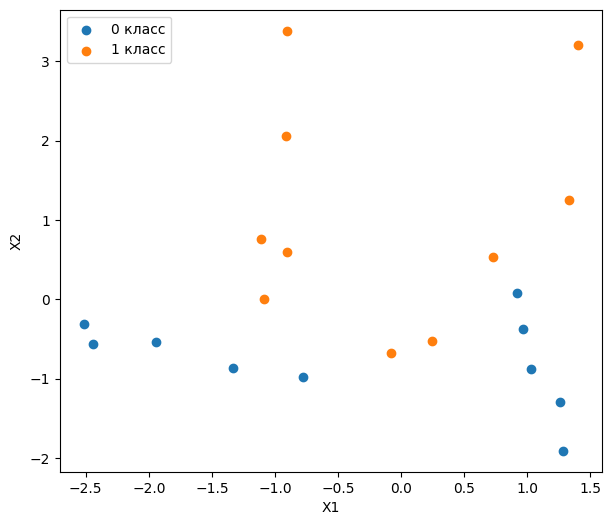

In [10]:
plt.figure(figsize=(7, 6), dpi=100)

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 класс')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 класс')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2');

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [12]:
pred = logreg.predict(X)

Теперь сделаем предсказания на всей выборке, чтобы понять, насколько хорошо модель научилась предсказывать целевую метку класса.

In [13]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,1,0
1,0,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,0


В первой строке должны были предсказать 1 класс, но модель предсказала 0, зато со следующим объектом нет проблем, целевая метка - 0 класс, предсказали тоже нулевой класс, можем дальше посмотреть на все объекты и сравнить истину с предсказанным классом. 

## Accuracy

Если мы так сделаем, то узнаем сколько раз модель ответила правильно - это и есть наша первая метрика Accuracy.


Это наиболее очевидный и простой способ расчета качества предсказаний:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$


Доля правильных ответов может изменяться от 0 до 1, где 0 - модель ниразу не попала правильно, все её предсказания ошибочные, а 1 - модель предсказала всё идеально.

In [15]:
pred_df['right'] = pred_df['ground truth'] == pred_df['prediction']
pred_df

,ground truth,prediction,right
0,1,0,False
1,0,0,True
2,1,0,False
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,1,1,True
9,1,0,False


In [16]:
pred_df['right'].sum() / pred_df.shape[0] # accuracy

0.8

In [17]:
pred_df['right'].mean()

0.8

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['ground truth'], pred_df['prediction'])

0.8

Получили 0.8 или 80% - доля верных предсказаний относительно всех предсказаний.

### Дисбаланс классов

Представим, что в нашей выборке очень много объектов нулевого класса и совсем ничего объектов первого класса, к тому же такое встречается очень часто, примером служит задача предсказания мошеннических транзакций, или она ещё называется fraud detection: очень много совершается обычных транзакций и крайне мало транзакций со злым умыслом.

Сгенерируем такую выборку, где есть дисбаланс классов, объектов 0 класса в 9 раз больше, чем объектов 1 класса (`weights=(0.9, 0.1)`).  
Для простоты понимания, будем считать, что 0 класс - это обычные транзакции в банке, а 1 класс - это подозрительные мошеннические транзакции.

In [20]:
from sklearn import datasets


X_disbalance, y_disbalance = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    random_state=2,
    weights=(0.9, 0.1)
)

X_disbalance, y_disbalance

(array([[ 0.66930255, -0.35556485],
        [ 0.96417816, -0.37583852],
        [-1.1177634 , -0.85116212],
        [-0.26257856, -1.50684503],
        [ 1.27004352, -2.01184296],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 0.7545933 ,  1.11410377],
        [ 0.37973272,  0.79063286],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-0.66010918, -1.0843706 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.85711456, -1.16420714],
        [-1.33222706, -0.85982898]]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

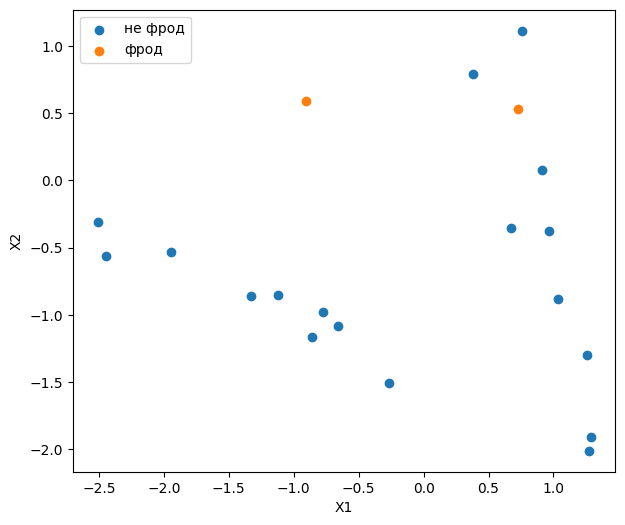

In [22]:
plt.figure(figsize=(7, 6), dpi=100)

class_0 = X_disbalance[y_disbalance == 0]
class_1 = X_disbalance[y_disbalance == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='не фрод')
plt.scatter(class_1[:, 0], class_1[:, 1], label='фрод')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2');

Если мы возьмем константную модель (`a(x) = 0`), которая всегда будет отвечать 0 класс на любой объект, который бы не видела, то получим приличную метрику accuracy:

In [25]:
pred = np.zeros((20))
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
pred_df_disbalance = pd.DataFrame({
    'ground truth': y_disbalance,
    'prediction': pred
})

pred_df_disbalance

,ground truth,prediction
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,1,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


Сделаем новый столбец в датафрейме, который будет показывать, угадала ли наша модель истинный класс, False - если предсказание неправильное и True - если правильное:

In [28]:
pred_df_disbalance['right'] = pred_df_disbalance['ground truth'] == pred_df_disbalance['prediction']
pred_df_disbalance

,ground truth,prediction,right
0,0,0.0,True
1,0,0.0,True
2,0,0.0,True
3,0,0.0,True
4,0,0.0,True
5,1,0.0,False
6,0,0.0,True
7,0,0.0,True
8,0,0.0,True
9,0,0.0,True


In [29]:
pred_df_disbalance['right'].sum() / pred_df_disbalance.shape[0] # accuracy

0.9

Получается очень высокая доля правильных ответов, которая стремится к 1, но по факту, модель бесполезная, алгоритм отвечает всегда нулевым классом, модель никогда не будет отвечать первым классом. Так что метрика accuracy хоть и высокая, но говорить о качественной модели мы здесь не можем.

### Ошибки имеют разную цену

Теперь поговорим про другую проблему метрики accuracy. Продолжаем знакомиться с задачами банков, обучили модель кредитного скоринга, с помощью неё, банк принимает решение о выдачи кредита человеку.  
Модель предсказывает, кому кредит выдавать (добропорядочный гражданин и будет исправно платить), а кому нет (человек постоянно просрачивает платежи по кредиту).

У нас вышло две модели, протестируем их работу на 10 клиентах.   

0 будем помечать клиентов, которые кредит не вернут, а 1 - которые вернут.
Предсказания моделей соответственно так же, 0 - модель предсказывает не возврат кредита, значит кредит не выдаем, а 1 - клиент кредит выплатит, значит можем быть в нём уверенными и выдаем ему деньги.

In [30]:
clients = [0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


Выборка сбалансированная, 5 клиентов имеют класс 0, а 5 имеют класс 1. Посмотрим на предсказания моделей:
1. Первая выдает кредит 8 людям, по итогу 5 людей кредит возвращают, а 3 не возвращают
2. Вторая модель выдает кредит 2 людям, и все 2 возвращают.

Можете подумать, какая модель лучше? Какую модель вы бы взяли себе в банк оценивать клиентов?

На самом деле правильного ответа нет, всё зависит от стратегии банка.  
- Если банку хочется больше заработать, то лучше выдавать больше кредитов, значит, лучше пользоваться первой моделью.   
- Если банку хочется меньше потерять, то лучше выдавать кредиты только проверенным людям, а значит, лучше пользоваться второй моделью.

Но при этом, метрика accuracy будет одинаковая на этих двух моделях, хотя они совершенно разные.

In [31]:
df['first_model_right'] = df['clients'] == df['first_model']
df['second_model_right'] = df['clients'] == df['second_model']

df

,clients,first_model,second_model,first_model_right,second_model_right
0,0,0,0,True,True
1,0,0,0,True,True
2,0,1,0,False,True
3,0,1,0,False,True
4,0,1,0,False,True
5,1,1,1,True,True
6,1,1,1,True,True
7,1,1,0,True,False
8,1,1,0,True,False
9,1,1,0,True,False


In [32]:
print(f"Accuracy первой модели {df['first_model_right'].sum() / df.shape[0]}")
print(f"Accuracy второй модели {df['second_model_right'].sum() / df.shape[0]}")

Accuracy первой модели 0.7
Accuracy второй модели 0.7


<table>

<tr>
<td>
Метрика
</td>

<td>
Формула
</td>

<td>
Диапазоны значений
</td>

<td>
Идеальное значение
</td>
</tr>

<tr>
<td>
Accuracy
</td>

<td>
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<table>

## Матрица ошибок (Confusion Matrix)

Оформим всё в матрицу:

|  <empty>   | $$y = 1$$ | $$y = 0$$ |
--- | --- | ---
| __$$a(x) = 1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = 0$$__ |   False Negative FN    |   True Negative TN   |


В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "1", говорим, что он *срабатывает*, а когда к "0", - *пропускает*. 
- Если алгоритм сработал (предсказал 1) и объект действительно относится к классу "1", получаем верное срабатывание/верный положительный ответ (**True Positive, TP**) - ВСЁ ВЕРНО
- Если алгоритм сработал (предсказал 1), а объект не относится к классу "1", это ложное срабатывание (**False Positive, FP**) - ОШИБКА
- Если алгоритм пропускает объект (предсказал 0), а его истинный класс "1", это ложный пропуск/ложный негативные ответ (**False Negative, FN**) - ОШИБКА
- Если алгоритм пропускает объект (предсказал 0), а истинный класс объекта "0", то это истинный пропуск (**True Negative, TN**) - ВСЁ ВЕРНО

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(df['clients'], df['first_model'])

array([[2, 3],
       [0, 5]], dtype=int64)

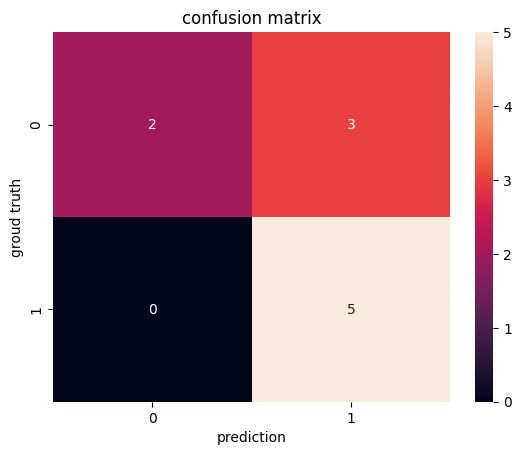

In [34]:
cm = confusion_matrix(df['clients'], df['first_model'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud truth');

И теперь видим, что TN у нас 2 штуки, TP - 5 штук, а ошибок FP 3 штуки, когда на истинный нулевой класс модель ответила 1 классом.

На этих TP, TN, FP, FN основываются две хорошие метрики - Precision и Recall.

**Точность (precision)** представляет из себя *долю истинных срабатываний* от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

**Полнота (recall)** считается как *доля объектов, истинно относящихся к классу "1"*, которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ будут составлять весь список объектов класса "1".


Метрики могут изменяться от 0 до 1, где 0 - модель ниразу не попала правильно, все её предсказания ошибочные, а 1 - модель всё предсказала идеально.

Есть очень хорошая картинка, с помощью которой можно продемонстрировать, как подсчитываются метрики для классификации.  
- Левая прямоугольная затемненная область - это область целевых объектов, это наши клиенты с 1 классом
- Правая светлая прямоугольная область - область нерелевантных объектов с 0 классом, когда клиенты нам не возвращают кредиты
- То, что выделено в окружность - это объекты, на которых модель сработала, предсказала 1 класс
- А всё, что не вошло в окружность - это объекты, которые модель пропустила.

<img src='https://hsto.org/webt/so/oy/7k/sooy7k2lckgmsla2lgugjlisvh8.png' width=700>

## Precision

**Точность (precision)** отвечает за *чистоту классификации*, рассчитывается, как истинные срабатывания, деленные на все срабатывания вообще.

$$precision(a, X) = \frac{TP}{TP+FP}$$

В идеале, когда знаменатель равен числителю, в этом случае метрика будет равна 1. В метрике precision минизируются ошибки *ложного срабатывания* (**False Positive**), хорошо, когда таких ошибок вообще нет, тогда классифицироваться как целевой класс будут только нужные нам объекты.

In [35]:
from sklearn.metrics import precision_score

precision_score(df['clients'], df['first_model'])

0.625

In [36]:
df

,clients,first_model,second_model,first_model_right,second_model_right
0,0,0,0,True,True
1,0,0,0,True,True
2,0,1,0,False,True
3,0,1,0,False,True
4,0,1,0,False,True
5,1,1,1,True,True
6,1,1,1,True,True
7,1,1,0,True,False
8,1,1,0,True,False
9,1,1,0,True,False


Метрика равна 0.625, мы верно классифицировали 5 объектов, а всего отнесли к первому классу 8 объектов, что и дало нам значение $\frac{5}{8} = 0.625$

In [37]:
from sklearn.metrics import precision_score

precision_score(df['clients'], df['second_model'])

1.0

Метрика равна 1, мы верно классифицировали два объектов из двух, которые модель отнесла к 1 классу, получается precision = $\frac{2}{2} = 1$.

Теперь две модели не кажутся такими одинаковыми, как были при подсчете метрики accuracy, по метрики precision выигрывает вторая модель, т.к. у неё нет *ложных срабатываний* **False Positive**, модель выдает кредиты только проверенным людям, поэтому и получилась очень *чистая* работа классификации.

## Recall


**Полнота (recall)** отвечает за *количество классификаций*, рассчитывается, как истинные срабатывания, деленные на объекты целевого класса.


$$recall(a, X) = \frac{TP}{TP+FN}$$


В идеале, когда знаменатель равен числителю, в этом случае метрика будет равна 1. В метрике recall минизируются ошибки *ложного пропуска* (**False Negative**), хорошо, когда таких ошибок нет, тогда мы найдем все возможные объекты целевого класса и никого не пропустим.

In [38]:
from sklearn.metrics import recall_score

recall_score(df['clients'], df['first_model'])

1.0

In [39]:
recall_score(df['clients'], df['second_model'])

0.4

Метрика равна 1, мы верно отнесли к 1 классу пять объектов из пяти, то есть нашли все объекты целевого класса, которые могли, по итогу и получили значение равное $\frac{5}{5} = 1$

Метрика равна 0.4, мы верно отнесли к целевому классу только два объекта из пяти возможных, то есть допустили 3 ошибки ложного пропуска false negative и получили метрику recall равную $\frac{2}{5} = 0.4$.

И снова модели не кажутся одинаковыми, их метрики recall сильно отличаются, теперь выигрышней смотрится первая модель, т.к. у неё нет *ложных пропусков* **False Negative**, модель выдала кредиты всем проверенным людям и никого не оставила без денег.

## Сравнение 

Сравним наши две модели по предсказанию 1 класса на 10 объектах:

|  <empty>   | first model | second model |
--- | --- | ---
| __precision__  |  0.625    |  1   |
| __recall__ |   1    |   0.4   |

У одной хороший recall, а у другой хороший precision, вот теперь можно смотреть на стратегию банка и принимать решение, что ему более важно:
- Если банку хочется **больше заработать**, то лучше выдавать кредиты *всем* людям, которые способны его вернуть, то есть ищем модель с максимальным *recall* - а это первая модель.
- Если банку хочется **меньше потерять**, то лучше выдавать кредиты *только* надежным людям, а значит ищем модель с лучшим *precision* - это вторая модель.


# Итого

<table>

<tr>
<td>
Метрика
</td>

<td>
Формула
</td>

<td>
Диапазоны значений
</td>

<td>
Идеальное значение
</td>
</tr>

<tr>
<td>
Precision
</td>

<td>
$$precision = \frac{TP}{TP + FP}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<td>
Recall
</td>

<td>
$$recall = \frac{TP}{TP + FN}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>
<tr>
<td>
Accuracy
</td>

<td>
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<table>

В этом занятии посмотрели на метрики для задачи классификации, которые учитывают разные ошибки - Precision и Recall.

**Precision** хороша для
- Задач, где важна *чистота* классификации
- Где нам не нужны ошибки *False Positive*

**Recall** хорош для
- Задач, где важно *количество* классиифкаций
- Где нам не нужны ошибки *False Negative*


# Объединение precision и recall

### Среднее гармоническое

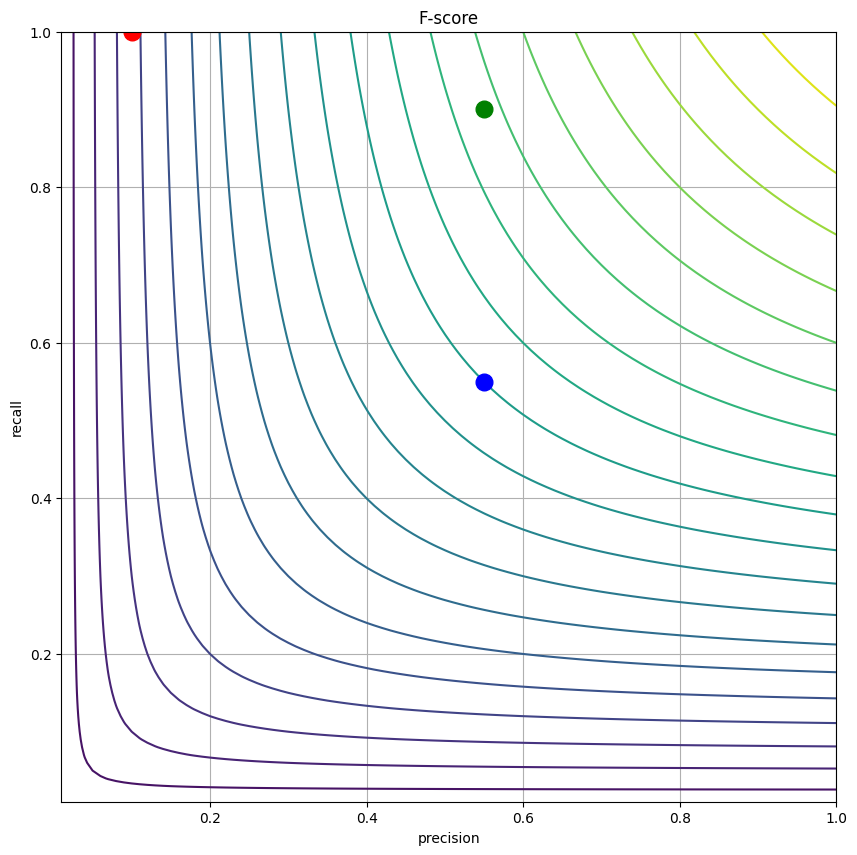

In [40]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(10, 10))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12)
plt.plot(0.55, 0.9, 'go', ms=12);

Теперь наконец-то наши модели с разными метриками полноты и точности дают разные объединенные показатели. Самая лучшая модель по гармоническому среднему - зеленая, с неплохой точностью и хорошей полнотой.

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.55   | 0.55|
| recall |   1    |   0.55   | 0.9 |
| **f-score** |   **0.1818**   |   **0.55**   | **0.683**|

То, что сейчас посчитали называется гармоническим среднем и метрикой F1-score.

<table>

<tr>
<td>
Метрика
</td>

<td>
Формула
</td>

<td>
Диапазоны значений
</td>

<td>
Идеальное значение
</td>
</tr>

<tr>
<td>
F1-мера
</td>

<td>

$$F_{1} = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>


<table>

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F1-мера является сглаженной версией минимума из точности и полноты.

In [41]:
from sklearn.metrics import f1_score

precision_1 = precision_score(df['clients'], df['first_model'])
precision_2 = precision_score(df['clients'], df['second_model'])

recall_1 = recall_score(df['clients'], df['first_model'])
recall_2 = recall_score(df['clients'], df['second_model'])

f1_1 = f1_score(df['clients'], df['first_model'])
f1_2 = f1_score(df['clients'], df['second_model'])

print(f'FIRST MODEL. accuracy 0.7, precision {precision_1}, recall {recall_1}, f1 {f1_1:.2f}')
print(f'SECOND MODEL. accuracy 0.7, precision {precision_2}, recall {recall_2}, f1 {f1_2:.2f}')

FIRST MODEL. accuracy 0.7, precision 0.625, recall 1.0, f1 0.77
SECOND MODEL. accuracy 0.7, precision 1.0, recall 0.4, f1 0.57


Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. Его изменение требуется, когда необходимо отдать приоритет точности или полноте, если того требует задача (примеры с АЭС и диагностикой заболевания). 
- При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$)
- Когда $\beta < 1$, то важнее точность
- Когда $\beta > 1$, то важнее полнота

In [42]:
from sklearn.metrics import f1_score

f1_score(df['clients'], df['first_model'])

0.7692307692307693

In [45]:
f1_score(df['clients'], df['second_model'])

0.5714285714285714

In [46]:
from sklearn.metrics import fbeta_score
 
fbeta_score(df['clients'], df['first_model'], beta=1)

0.7692307692307693

In [47]:
fbeta_score(df['clients'], df['first_model'], beta=1.5)

0.8441558441558441

In [48]:
fbeta_score(df['clients'], df['first_model'], beta=0.5)

0.6756756756756757

Все три метрики можно вывести с помощью функции `classification_report` из `sklearn`.

In [49]:
from sklearn.metrics import classification_report

print(classification_report(df['clients'], df['first_model']))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



# Итого

<table>

<tr>
<td>
Метрика
</td>

<td>
Формула
</td>

<td>
Диапазоны значений
</td>

<td>
Идеальное значение
</td>
</tr>

<tr>
<td>
Precision
</td>

<td>
$$precision = \frac{TP}{TP + FP}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<td>
Recall
</td>

<td>
$$recall = \frac{TP}{TP + FN}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>
<tr>
<td>
Accuracy
</td>

<td>
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>
<tr>
<td>
F-мера
</td>

<td>

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<table>

# ROC AUC

In [50]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [51]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [52]:
from sklearn.model_selection import train_test_split


np.random.seed(5)
features = np.random.randint(X.shape[1], size=2)


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, features], y, test_size=10, random_state=4)

In [53]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

Наши модели машинного обучения на выходе могут давать метку класса, к которому принадлежит объект через метод predict.

In [55]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

А так же вероятность принадлежности к каждому классу через метод predict_proba.

In [57]:
model.predict_proba(X_test)

array([[0.40634004, 0.59365996],
       [0.05994031, 0.94005969],
       [0.99875512, 0.00124488],
       [0.96719277, 0.03280723],
       [0.8846768 , 0.1153232 ],
       [0.92783856, 0.07216144],
       [0.03561694, 0.96438306],
       [0.02859731, 0.97140269],
       [0.41023877, 0.58976123],
       [0.00563158, 0.99436842]])

Так как классов только два, то и видим 2 столбика, 1 столбик - это вероятность того, что объект является нулевым классом, а 2 столбик - это вероятность того, что объект первый класс.   
В сумме вероятности дают 1.   

К примеру, первый объект вероятней всего будет 1 классом (85% объект может быть 1 классом, и 15% объект может быть 0 классом), а третий объект со стопроцентной уверенностью будет 0 классом (нулевая вероятность быть 1 классом, и единичная вероятность быть 0 классом)

Оперируя вероятностями мы можем самостоятельно принимать решения выше или ниже какой отметки, объект становится нулевым классом или первым. По умолчанию такая отсечка равна 0.5.

### Визуализириуем

Визуализируем вероятности быть 1 классом наших 9 объектов, по оси абсцисс порядковый номер объектов, а по оси ординат вероятность быть первым классом и раскрасим их в зависимости от истинной метки класса.   
Оранжевые - объекты 0 класса, синие - объекты 1 класса.

При этом есть низкой вероятностью обладают объекты как первого класса, так и нулевого.

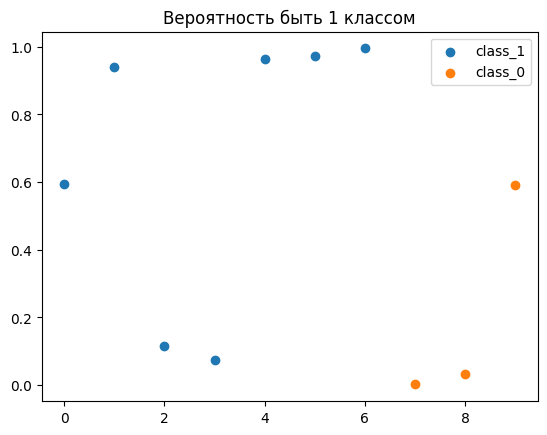

In [66]:
pred_proba = model.predict_proba(X_test)

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.title('Вероятность быть 1 классом')
plt.legend()

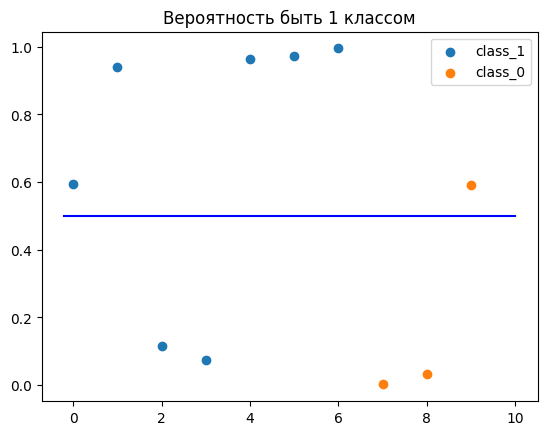

In [67]:
# добавим отсетчку 0.5
threshold = 0.5
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

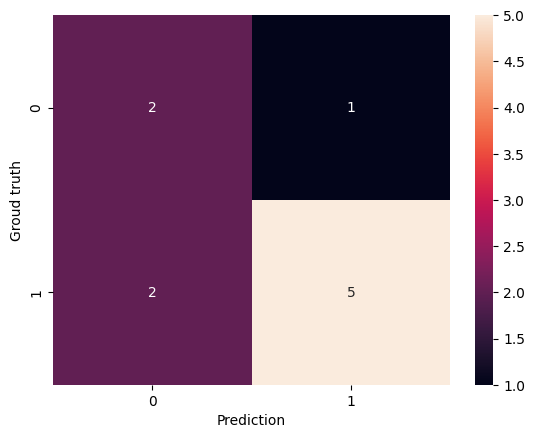

In [68]:
from sklearn.metrics import confusion_matrix


pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

И теперь стоит поговорить про расчет метрики ROC-AUC. Чтобы её получить нужно оперировать двумя метриками, которые строятся на матрице ошибок - это TPR и FPR.


**TPR (True Positive Rate, доля верных срабатываний)** - отношение числа верных срабатываний к размеру положительного класса:

$$ TPR = \frac{TP}{TP+FN} $$

то есть TPR по сути представляет из себя полноту - сколько раз модель правильно нашла целевой класс среди тех людей, которые действительно являются им.

Данная метрика в идеале должна стремиться к единице.


**FPR (False Positive Rate, доля ложных срабатываний)** - отношение числа ложных срабатываний к общему размеру отрицательного класса:
$$FPR = \frac{FP}{FP+TN}$$

а здесь имеем некий аналог полноты только для ошибок - сколько раз модель ошибочно нашла целевой класс среди всех людей нецелевого класса.

Данная метрика в идеале должна стремиться к нулю.


In [69]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.7142857142857143
FPR 0.3333333333333333


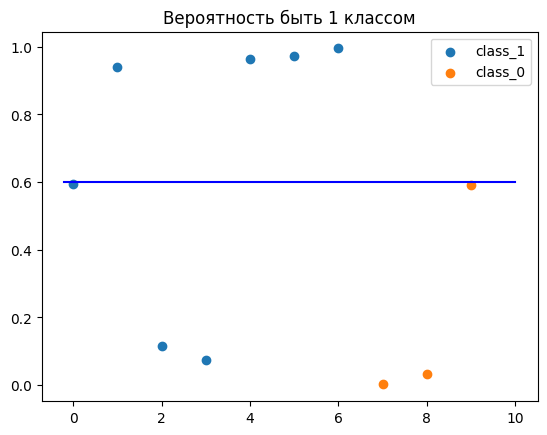

In [71]:
# поднинем пороговое значение вероятности
threshold = 0.6

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 0.5714285714285714
FPR 0.0


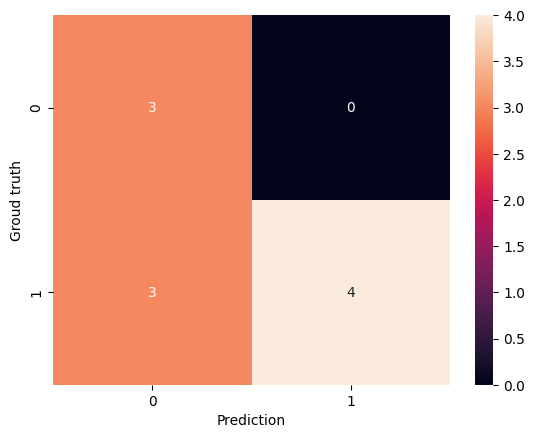

In [72]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

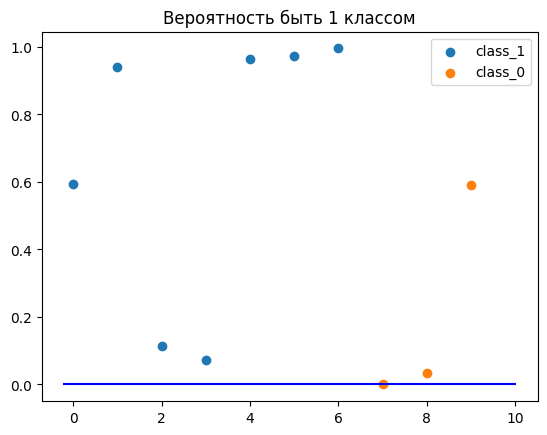

In [74]:
threshold = 0

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 1.0
FPR 1.0


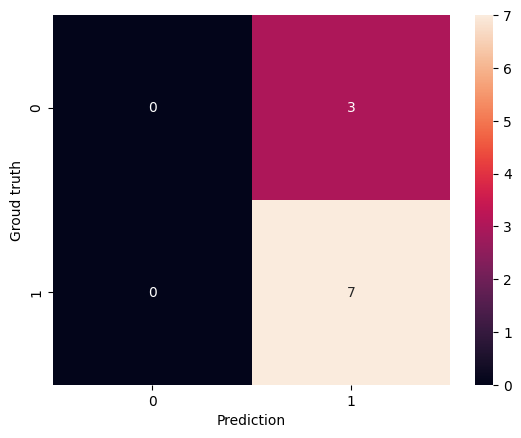

In [76]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

## ROC-кривая (ROC-curve)

На этих разных отсечках и строится метрика ROC-кривая и ROC-AUC. Из себя она представляет кривую, состоящую из точек с разными отсечками.  
Ниже пример ROC-кривой на обучающей выборке. Для неё выбираются разные отсечки и считаются метрики TPR и FPR, далее откладываются точки. Прямая начинается с точки (0, 0), где нулевой FPR и где нулевой TPR и заканчивается в точке (1, 1), где единичный FPR и такой же TPR.

В идеале, когда ROC-кривая проходит через точку (0, 1), где идеальный FPR нулевой - нет ни одной ошибки FP, и такой же идеальный TPR (recall), говорящий что нет ни одной ошибки FN, но на реальных данных такого не встретишь, только на синтетических искусственных выборках.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1200px-Roc_curve.svg.png' width=450>


In [78]:
pred_proba

array([[0.40634004, 0.59365996],
       [0.05994031, 0.94005969],
       [0.99875512, 0.00124488],
       [0.96719277, 0.03280723],
       [0.8846768 , 0.1153232 ],
       [0.92783856, 0.07216144],
       [0.03561694, 0.96438306],
       [0.02859731, 0.97140269],
       [0.41023877, 0.58976123],
       [0.00563158, 0.99436842]])

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba[:, 1])

0.9047619047619049

In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        1.        ]),
 array([0.        , 0.14285714, 0.71428571, 0.71428571, 1.        ,
        1.        ]),
 array([       inf, 0.99436842, 0.59365996, 0.58976123, 0.07216144,
        0.00124488]))

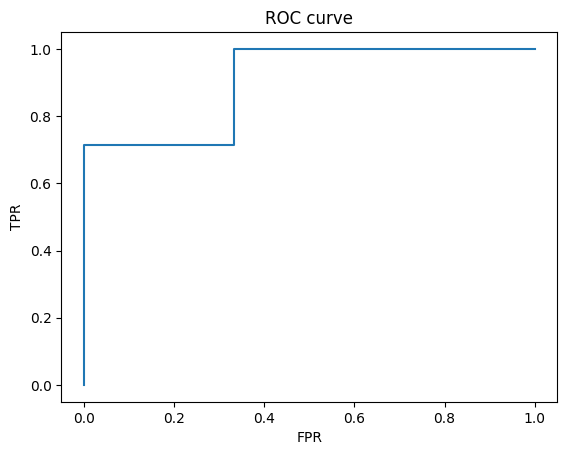

In [82]:
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

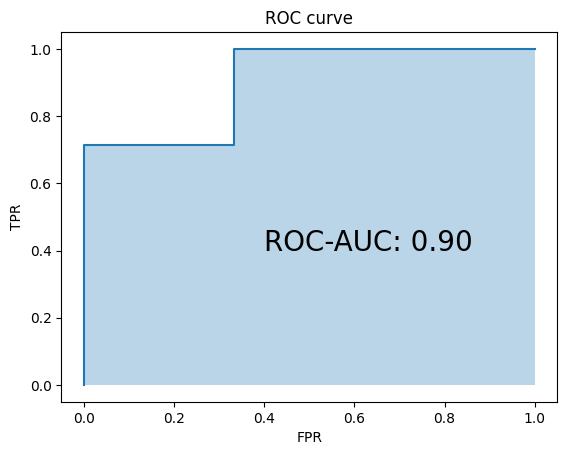

In [83]:
plt.plot(fpr, tpr)
plt.fill_between(x=fpr, y1=0, y2=tpr, alpha=0.3)
plt.text(0.4, 0.4, f"ROC-AUC: {roc_auc_score(y_test, pred_proba[:, 1]):.2f}", size=20)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

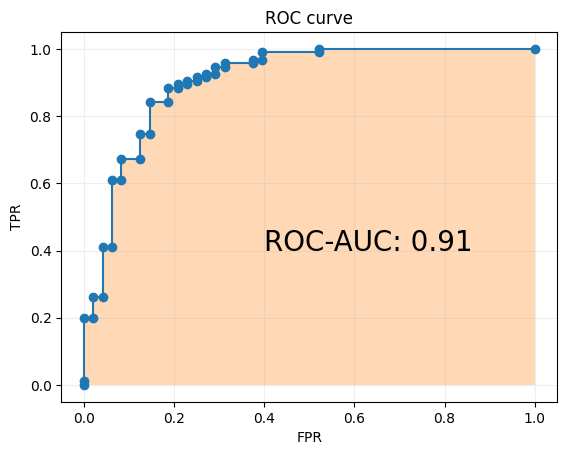

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, features], y, test_size=0.25, random_state=4)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, zorder=3)
plt.scatter(fpr, tpr, zorder=3)
plt.fill_between(x=fpr, y1=0, y2=tpr, alpha=0.3,)

plt.text(0.4, 0.4, f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.2f}", size=20)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.grid(alpha=0.2)
plt.ylabel("TPR")
plt.show()

# Практика

In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

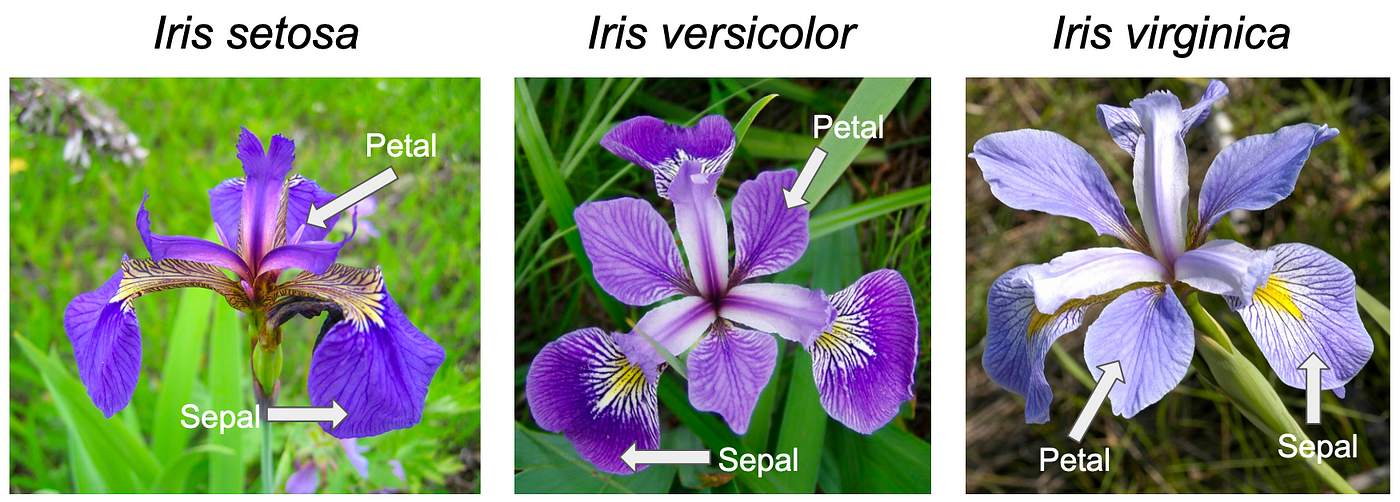

In [98]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


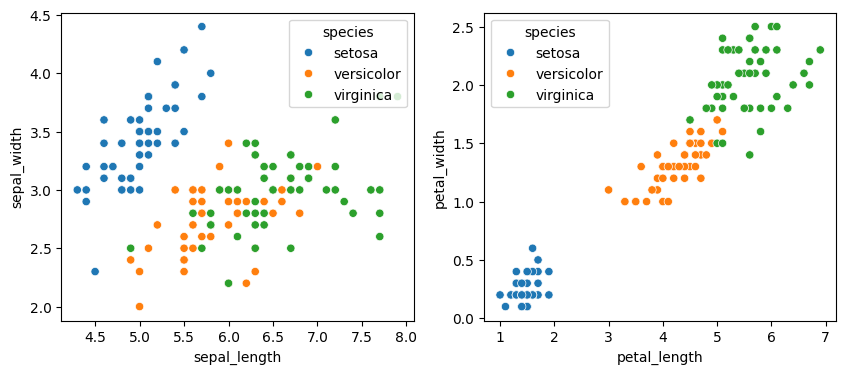

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax[0])
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', ax=ax[1])

plt.show()

In [100]:
melted = df.melt(value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], id_vars='species', ignore_index=False)
melted

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
145,virginica,petal_width,2.3
146,virginica,petal_width,1.9
147,virginica,petal_width,2.0
148,virginica,petal_width,2.3


In [101]:
melted.loc[0]

,species,variable,value
0,setosa,sepal_length,5.1
0,setosa,sepal_width,3.5
0,setosa,petal_length,1.4
0,setosa,petal_width,0.2


[]

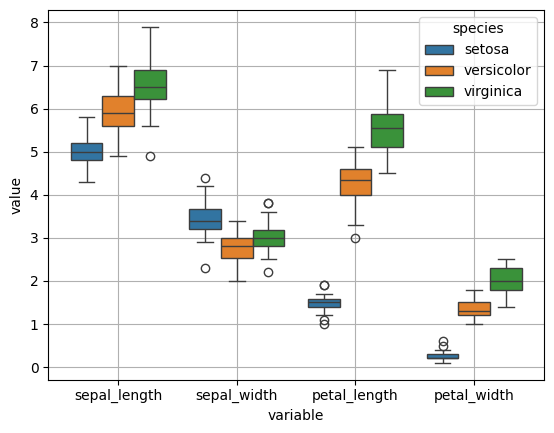

In [102]:
sns.boxplot(data=melted, x='variable', y='value', hue='species')
plt.grid()
plt.plot()

In [110]:
# Логрегрессия
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [104]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='species'), df['species'], random_state=1062023, test_size=0.25)

In [118]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [119]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
72,6.3,2.5,4.9,1.5


In [120]:
model.coef_

array([[-0.43848237,  0.77757223, -2.28265706, -0.91453097],
       [ 0.42117304, -0.35345106, -0.14029361, -0.9088279 ],
       [ 0.01730933, -0.42412118,  2.42295066,  1.82335887]])

In [30]:
# sygm(y) = -0.39 * x + 0.5 * x2 + (-1.66) * x3 + (-0.66) * x4 + C

In [121]:
from sklearn.metrics import make_scorer, f1_score

In [125]:
y_pred = model.predict(X_test)

In [124]:
model.predict_proba(X_test).round(3)

array([[0.984, 0.016, 0.   ],
       [0.   , 0.041, 0.959],
       [0.11 , 0.885, 0.005],
       [0.   , 0.134, 0.866],
       [0.001, 0.223, 0.776],
       [0.001, 0.537, 0.462],
       [0.04 , 0.913, 0.048],
       [0.   , 0.019, 0.981],
       [0.016, 0.922, 0.062],
       [0.016, 0.604, 0.381],
       [0.198, 0.799, 0.003],
       [0.007, 0.876, 0.117],
       [0.981, 0.019, 0.   ],
       [0.   , 0.007, 0.993],
       [0.351, 0.648, 0.002],
       [0.131, 0.856, 0.013],
       [0.022, 0.759, 0.218],
       [0.969, 0.031, 0.   ],
       [0.048, 0.934, 0.018],
       [0.016, 0.856, 0.128],
       [0.011, 0.815, 0.174],
       [0.071, 0.921, 0.009],
       [0.954, 0.046, 0.   ],
       [0.053, 0.898, 0.05 ],
       [0.974, 0.026, 0.   ],
       [0.05 , 0.928, 0.022],
       [0.005, 0.815, 0.18 ],
       [0.974, 0.026, 0.   ],
       [0.033, 0.945, 0.022],
       [0.975, 0.025, 0.   ],
       [0.   , 0.008, 0.992],
       [0.   , 0.007, 0.993],
       [0.958, 0.042, 0.   ],
       [0.

In [128]:
f1_score(y_test, y_pred, average='weighted')

0.9466374269005847

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [137]:
from sklearn.metrics import ConfusionMatrixDisplay

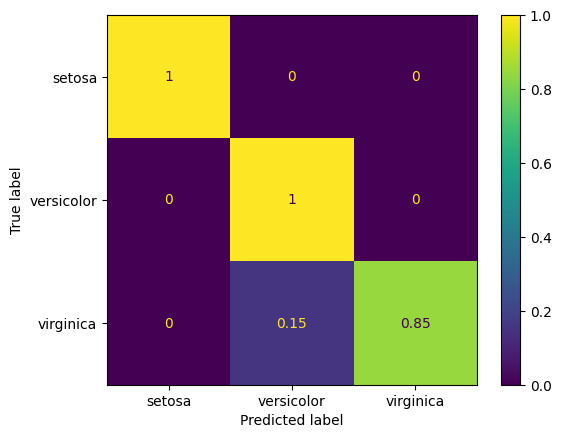

In [150]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, normalize='true'), display_labels=['setosa', 'versicolor', 'virginica']).plot()
plt.show()

In [151]:
from sklearn.pipeline import Pipeline

In [152]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('scale_data', StandardScaler()), ('logreg', LogisticRegression())])

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
params = {'logreg__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [159]:
scorer = make_scorer(f1_score, average='weighted', greater_is_better=True)

In [160]:
model = GridSearchCV(pipeline, param_grid=params, scoring=scorer, n_jobs=1, verbose=1)

In [163]:
from sklearn.preprocessing import LabelEncoder


array([1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 1])

In [169]:
encoder =  LabelEncoder()
model.fit(X_train, encoder.fit_transform(y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('scale_data', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=1,
             param_grid={'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga']},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [170]:
model.cv_results_['mean_test_score']

array([0.95511741, 0.88653764, 0.95511741, 0.90687628, 0.95511741,
       0.95511741])

In [171]:
model.best_params_

{'logreg__solver': 'lbfgs'}

In [174]:
scorer(model.best_estimator_, X_test, encoder.transform(y_test))

0.9466374269005847

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors':np.arange(1,50), 
    'knn__weights' : ['uniform', 'distance'], 
    'knn__metric': ['euclidean', 'manhattan', 'cosine'],
    'scale__with_mean': [True, False],
    'scale__with_std': [True, False],    
}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer, verbose=1)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
Best Score:0.9717757176780829
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance', 'scale__with_mean': True, 'scale__with_std': True}


In [179]:
pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors':np.arange(1,50), 
    'knn__weights' : ['uniform', 'distance'], 
    'knn__metric': ['euclidean'],
    'scale__with_mean': [False],
    'scale__with_std': [False],    
}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer, verbose=1)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Best Score:0.9324776026778225
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 12, 'knn__weights': 'uniform', 'scale__with_mean': False, 'scale__with_std': False}
